Завдання 1: Реалізація SVD

In [1]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds
from matplotlib import pyplot as plt

def compute_svd(A):
    # Step 1: Compute A^T * A and its eigenvalues and eigenvectors
    ATA = A.T @ A
    eigenvalues_V, V = np.linalg.eig(ATA)
    
    # Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues_V)[::-1]
    eigenvalues_V = eigenvalues_V[sorted_indices]
    V = V[:, sorted_indices]
    
    # Step 2: Compute A * A^T and its eigenvalues and eigenvectors
    AAT = A @ A.T
    eigenvalues_U, U = np.linalg.eig(AAT)
    
    # Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues_U)[::-1]
    eigenvalues_U = eigenvalues_U[sorted_indices]
    U = U[:, sorted_indices]
    
    # Step 3: Compute the Sigma matrix
    # Sigma is a rectangular diagonal matrix with square roots of eigenvalues
    Sigma = np.zeros(A.shape)
    for i in range(min(A.shape)):
        Sigma[i, i] = np.sqrt(eigenvalues_U[i])

    V, _ = np.linalg.qr(V)
    U, _ = np.linalg.qr(U)
    
    # Step 4: Compute the product U * Sigma * V^T
    SVD_reconstructed = U @ Sigma @ V.T
    
    return U, Sigma, V.T, SVD_reconstructed

# Test the function with a random matrix
A = np.array([[1, 2, 3], [3, 4, 5]])
SVD_reconstructed = compute_svd(A)

SVD_reconstructed


(array([[-0.46410668, -0.88577931],
        [-0.88577931,  0.46410668]]),
 array([[7.97638869, 0.        , 0.        ],
        [0.        , 0.61418515, 0.        ]]),
 array([[-0.39133557, -0.5605708 , -0.72980603],
        [ 0.8247362 ,  0.13817999, -0.54837623],
        [ 0.40824829, -0.81649658,  0.40824829]]),
 array([[1., 2., 3.],
        [3., 4., 5.]]))

Завдання 2.1: зчитування та аналіз даних з рейтингами

In [2]:
file_path = 'ml-latest-small/ratings.csv'
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')

ratings_matrix = ratings_matrix.dropna(thresh=25, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=10, axis=1)

ratings_matrix

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Застосування SVD-розкладу для візуалізації матриць

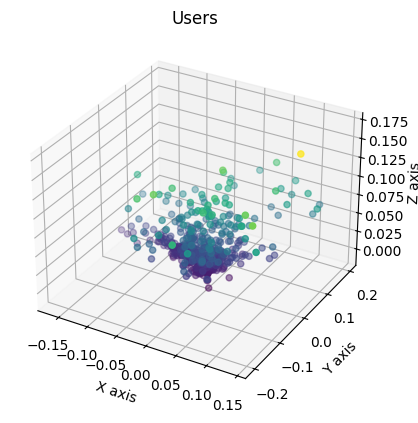

In [3]:
ratings_matrix_filled = ratings_matrix.fillna(2.5)
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(R_demeaned, k=3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(U[:, 0], U[:, 1], U[:, 2], c=U[:, 2], cmap='viridis')

# Set plot title and labels (customize as needed)
ax.set_title('Users')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()

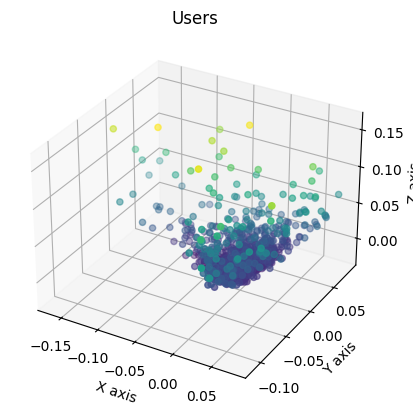

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(Vt[0, :], Vt[1, :], Vt[2, :], c=Vt[2, :], cmap='viridis')

# Set plot title and labels (customize as needed)
ax.set_title('Users')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()

Завдання 2.2: написання алгоритму рекомендацій

In [5]:
all_user_predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)


def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    if userID <= 0 or userID > len(predictions_df):
        raise ValueError("userID is out of the valid range.")
    
    user_row_number = userID - 1
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    user_data = original_ratings_df[original_ratings_df.userId == userID]
    user_full = (user_data.merge(movies_df, how='left', on='movieId').sort_values(['rating'], ascending=False))

    print(f'User {userID} has already rated {user_full.shape[0]} movies.')
    print(f'Recommending the highest {num_recommendations} predicted ratings movies not already rated.')
    
    # Create a DataFrame from sorted_user_predictions with explicit column names
    predictions = pd.DataFrame(sorted_user_predictions).reset_index()
    predictions.columns = ['movieId', 'Predictions']
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet
    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])]
                       .merge(predictions, on='movieId')
                       .sort_values('Predictions', ascending=False)
                       .iloc[:num_recommendations, :-1])

    return recommendations[['title', 'genres']].reset_index(drop=True)

m_df = pd.read_csv('ml-latest-small/movies.csv')

recomendations = recommend_movies(preds_df, 1, m_df, df, 10)


User 1 has already rated 232 movies.
Recommending the highest 10 predicted ratings movies not already rated.


Дані до прогнозування:

In [6]:

ratings_matrix

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Дані після прогнозування:

In [7]:
preds_df

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,3.873948,2.929958,2.796096,2.638356,3.278392,2.705220,2.540090,3.111107,3.070707,2.475965,...,2.490722,2.500152,2.524593,2.497056,2.477662,2.543054,2.507247,2.500270,2.502967,2.483741
2,2.514769,2.525913,2.466897,2.483215,2.515118,2.474665,2.493006,2.510370,2.442070,2.511318,...,2.517093,2.584098,2.519253,2.525968,2.593089,2.521128,2.547561,2.516386,2.520493,2.539555
3,2.450612,2.484400,2.480957,2.488410,2.468573,2.485122,2.491904,2.476365,2.469889,2.495918,...,2.496043,2.503091,2.494801,2.496148,2.504436,2.493839,2.498134,2.495553,2.495747,2.498509
4,2.811516,2.449188,2.597919,2.500998,2.781665,2.540791,2.521087,2.543495,2.652357,2.486668,...,2.483852,2.391017,2.515679,2.520600,2.400150,2.558071,2.496086,2.494401,2.501376,2.466814
5,2.947725,2.700741,2.620667,2.584141,2.693620,2.601939,2.519260,2.748464,2.741036,2.490094,...,2.492481,2.478725,2.488837,2.467055,2.454724,2.472924,2.463004,2.491937,2.485362,2.475840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.303474,2.476560,2.620547,2.450342,3.281597,2.511715,2.557151,2.641077,2.628258,2.553701,...,2.570747,2.623393,2.662109,2.707992,2.690258,2.781809,2.738692,2.594794,2.631591,2.626900
607,3.576637,2.942727,2.776458,2.679454,3.023727,2.723983,2.553726,3.063423,3.033683,2.493382,...,2.501654,2.490152,2.505304,2.464926,2.447933,2.485796,2.463725,2.503289,2.494272,2.476450
608,3.598862,2.909191,2.549292,2.499594,3.181762,2.511825,2.488050,2.978384,2.624105,2.529916,...,2.569393,2.899817,2.612455,2.629690,2.933498,2.646206,2.742547,2.575107,2.600187,2.676904


Рекомендації:

In [8]:
recomendations

,title,genres
0,"Shawshank Redemption, The (1994)",Crime|Drama
1,Terminator 2: Judgment Day (1991),Action|Sci-Fi
2,"Godfather, The (1972)",Crime|Drama
3,Apollo 13 (1995),Adventure|Drama|IMAX
4,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
5,"Sixth Sense, The (1999)",Drama|Horror|Mystery
6,"Godfather: Part II, The (1974)",Crime|Drama
7,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
8,Blade Runner (1982),Action|Sci-Fi|Thriller
9,Aliens (1986),Action|Adventure|Horror|Sci-Fi
